# Lab | Feature extraction

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)


In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Standardize header names

data_cols=customer_df.columns
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols
customer_df.columns=cols

In [4]:
#Changing "employmentstatus" column to "employment_status"

customer_df.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [5]:
customer_df=customer_df.drop(["customer"], axis=1)

#Dropping "customer" column because any ID variable is unique, I could also set the "customer" column as an index instead of dropping.

In [6]:
#Extract numerical variables

numericals_df = customer_df.select_dtypes(include = np.number)
numericals_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### 1. Open the categoricals variable we created before.

In [7]:
#Extract categorical variables

categorical_df = customer_df.select_dtypes(np.object)
categorical_df.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

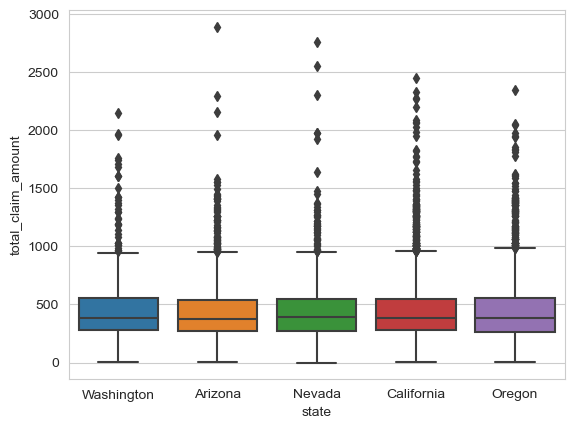

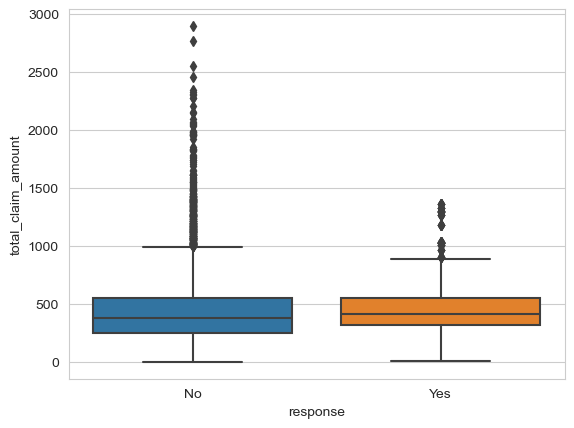

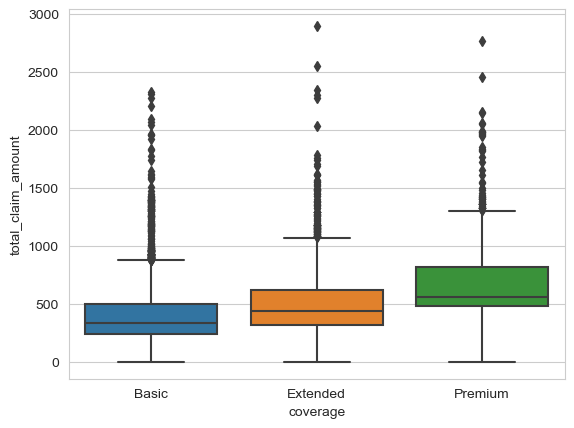

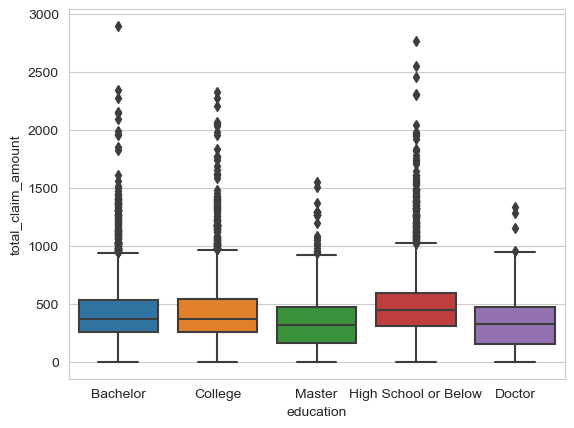

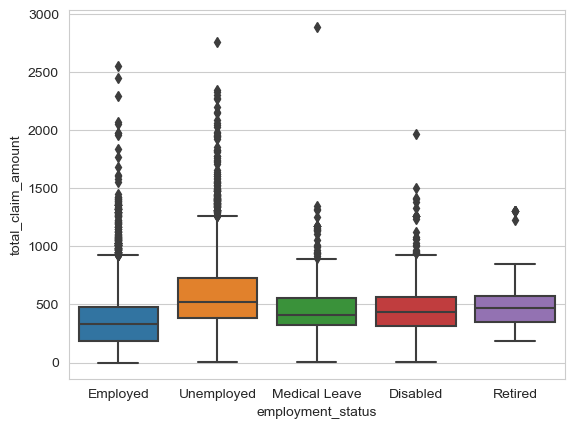

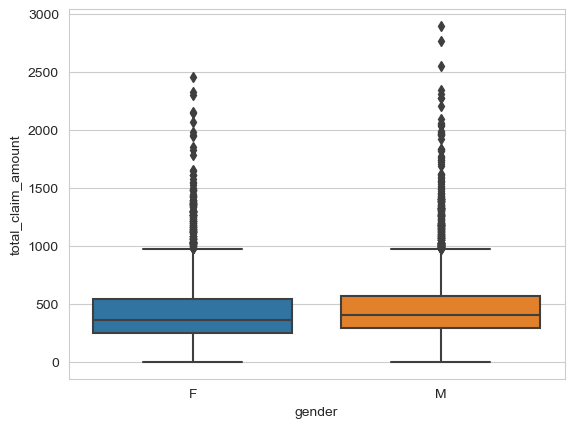

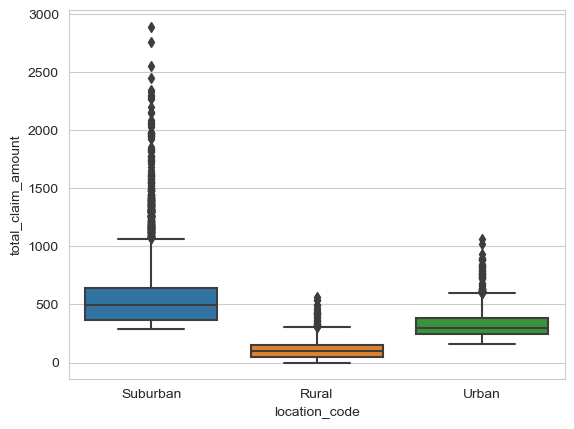

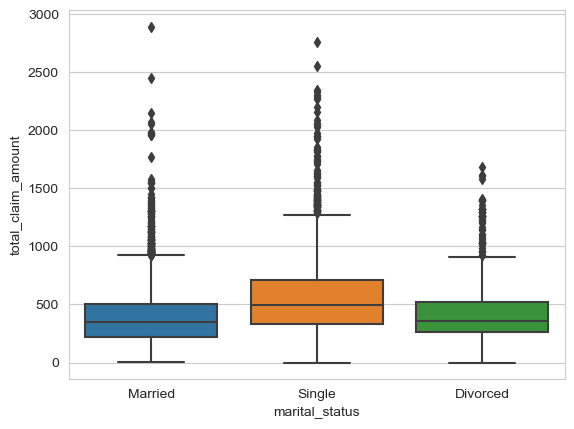

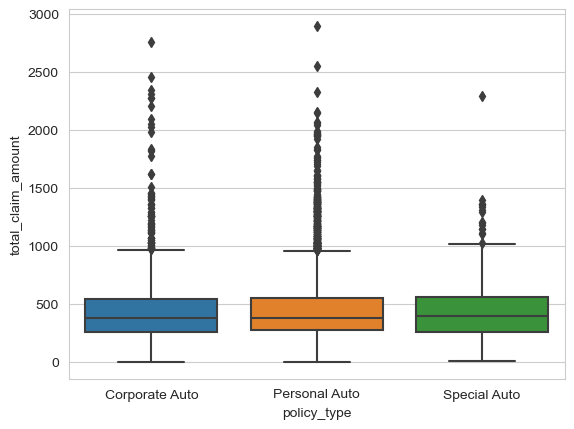

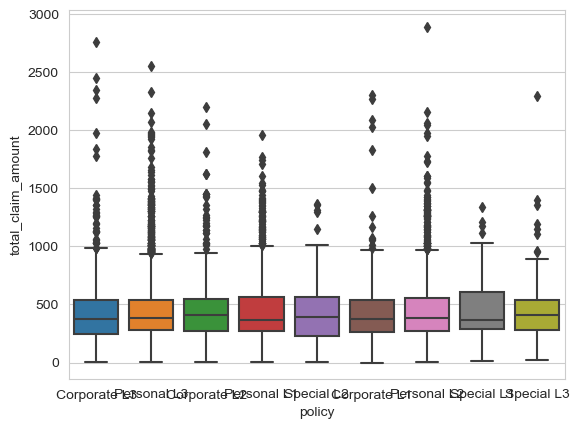

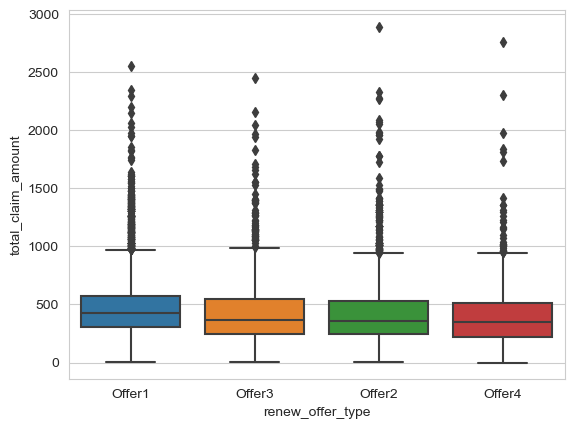

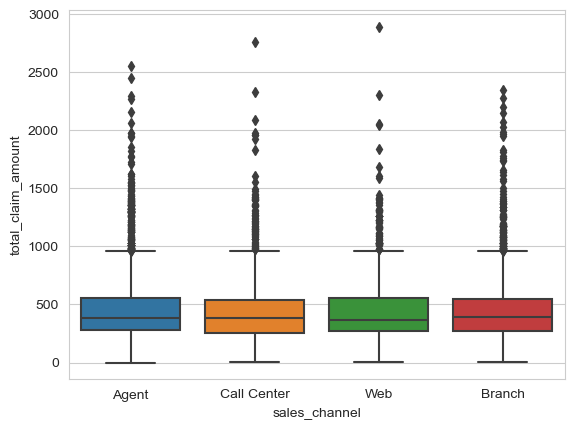

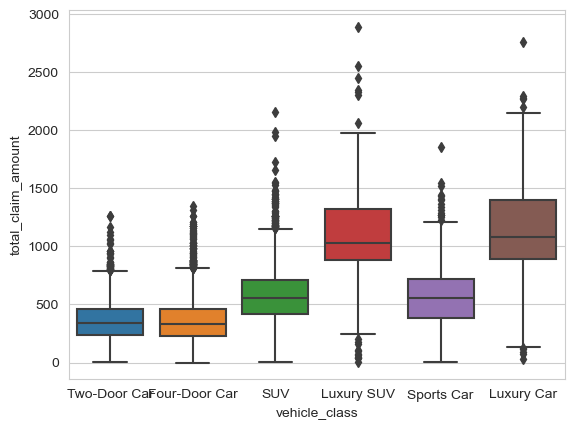

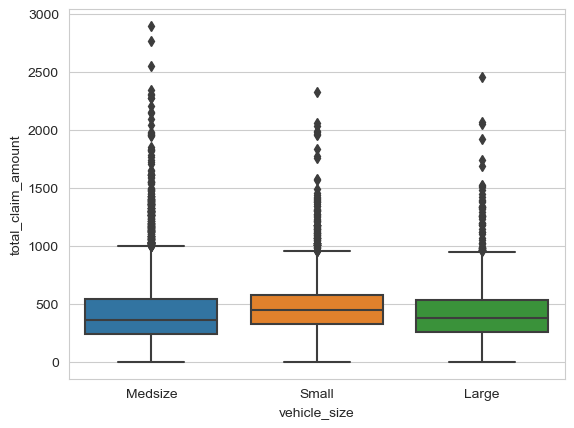

In [8]:
sns.boxplot(x="state", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="response", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="coverage", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="education", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="employment_status", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="gender", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="location_code", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="marital_status", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="policy_type", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="policy", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="renew_offer_type", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="sales_channel", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="vehicle_class", y="total_claim_amount", data=customer_df)
plt.show()
sns.boxplot(x="vehicle_size", y="total_claim_amount", data=customer_df)
plt.show()

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


Analysing the box plots between our categorical features and our target, I see that there is not a lot of variation in Y in the following columns:

* vehicle_size
* sales_channel
* renew_offer_type
* policy
* policy_type
* gender
* response
* state


Which means there is not a strong relationship between our target and the categorical features mentioned above.
Those categorical variables will not be good in determining the target total_claim_amount, therefore I am going to drop them.

#### 4. Plot time variable. Can you extract something from it?

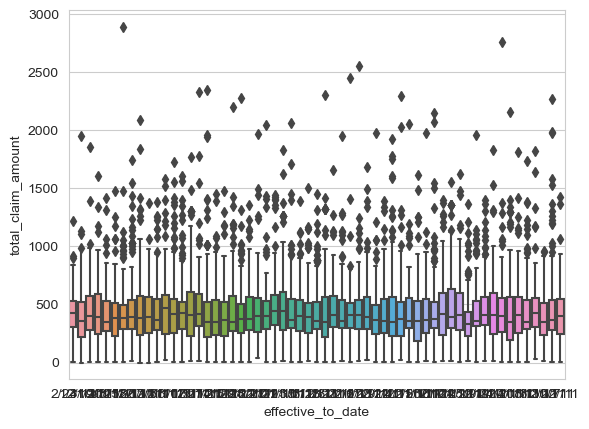

In [9]:
sns.boxplot(x="effective_to_date", y="total_claim_amount", data=customer_df)
plt.show()

Effective_to_date has too many values. 

We could extract the months from date, to see if we could reduce the number of values and have only 2 categories, January and February.

In [10]:
#First, chance effective_to_date from object to datetime so we can extract months from date.

customer_df["effective_to_date"]=pd.to_datetime(customer_df["effective_to_date"])

In [12]:
customer_df.effective_to_date.describe()

#our effective_to_date column has dates between 2011-01-01 and 2011-02-28.

count                    9134
unique                     59
top       2011-01-10 00:00:00
freq                      195
first     2011-01-01 00:00:00
last      2011-02-28 00:00:00
Name: effective_to_date, dtype: object

In [13]:
# First convert datetime to strtime to be able to extract the month.  
# The strftime() method returns a string representing date and time 


customer_df["effective_to_date"] = customer_df["effective_to_date"].dt.strftime('%Y-%m-%d')


In [15]:
#Extracting months to a new column.

customer_df["effective_to_date_month"] = customer_df["effective_to_date"].apply(lambda x: "January_2011" if x > "2011-01-01" and x <= "2011-01-31" else "February_2011")

In [16]:
customer_df.effective_to_date_month.value_counts()

January_2011     4750
February_2011    4384
Name: effective_to_date_month, dtype: int64

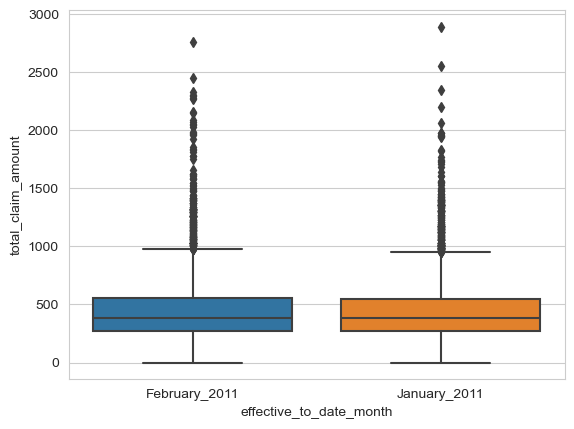

In [18]:
sns.boxplot(x="effective_to_date_month", y="total_claim_amount", data=customer_df)
plt.show()

Now we can see only 2 groups of effective_to_date column for February and March.

In [19]:
# OR extract month using dt.month attribute where 1 is January and 2 is February. 


#First convert to datetime format
customer_df["effective_to_date"]=pd.to_datetime(customer_df["effective_to_date"])

#Then extract month
customer_df['effective_to_date_month2'] = customer_df['effective_to_date'].dt.month

customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month,effective_to_date_month2
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February_2011,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January_2011,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February_2011,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,January_2011,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,February_2011,2
